In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotilb inline

In [2]:
train_data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/train.csv')
test_data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/fillna_test.csv')
col_train=['time', 'year', 'month', 'day', 'hour', 'min', 's', 'tem_out', 'hum_out', 'air_out',
       'hum_in', 'air_in','temperature']
col_test=['time', 'year', 'month', 'day', 'hour', 'min', 's', 'tem_out', 'hum_out', 'air_out',
       'hum_in', 'air_in']
train_data.columns=col_train
test_data.columns=col_test

In [3]:
train_data.fillna(method='ffill',inplace=True)

In [4]:
sets=train_data[train_data['min'].isin([0,30])].reset_index(drop=True)

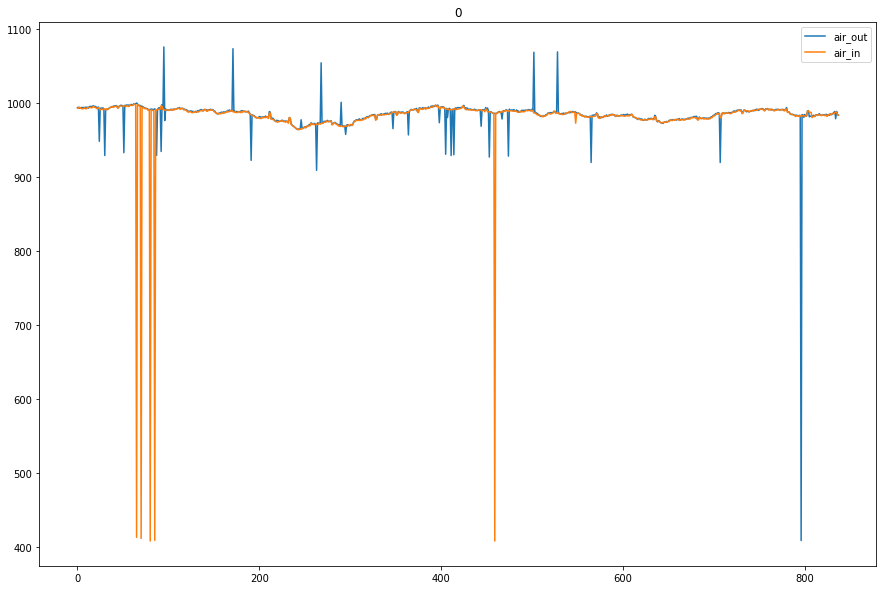

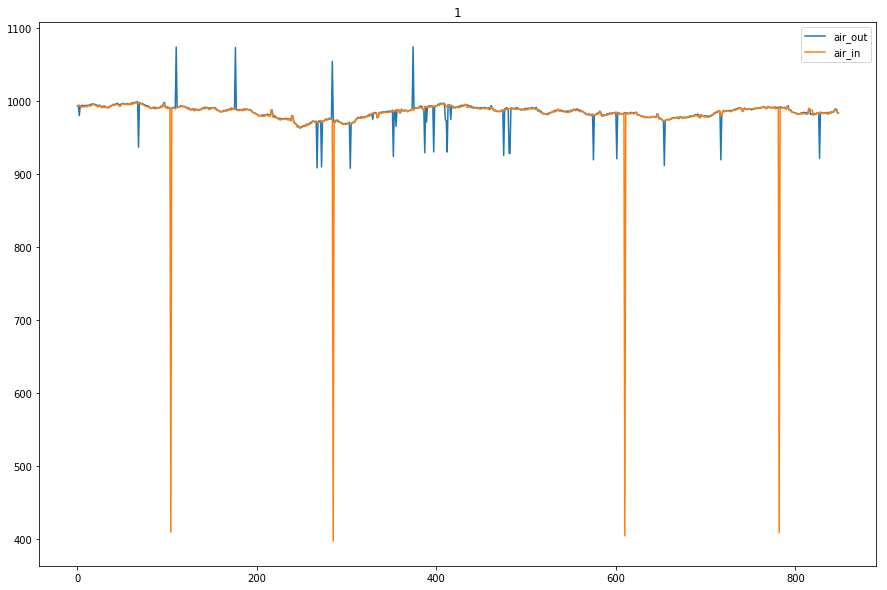

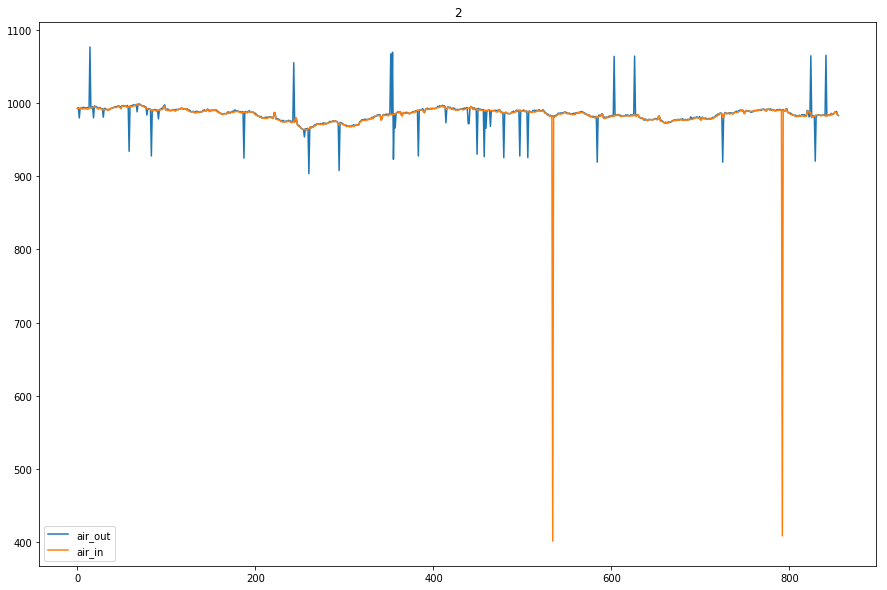

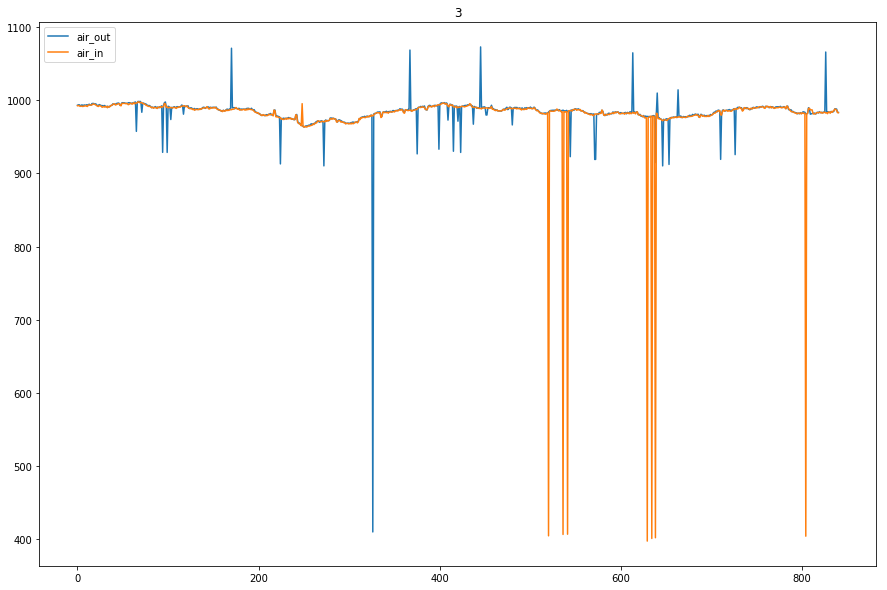

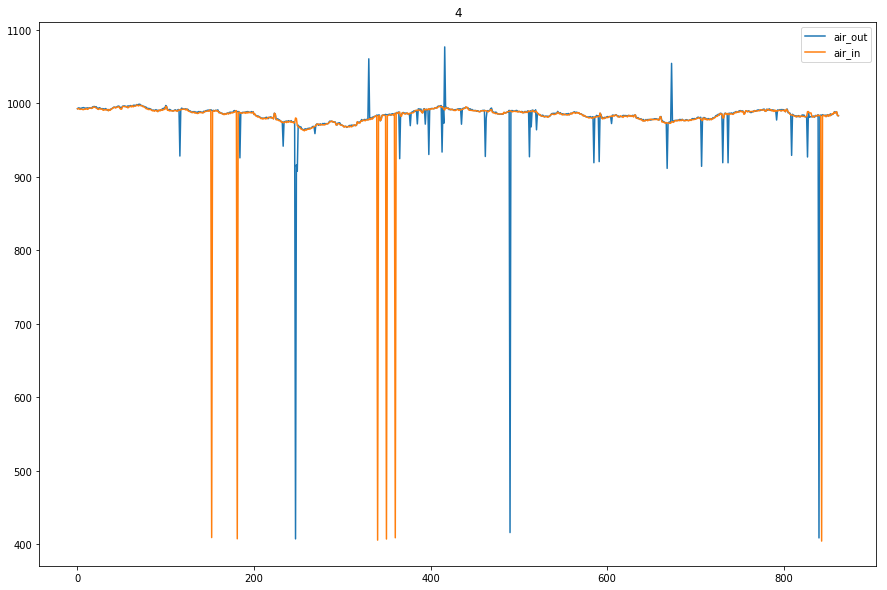

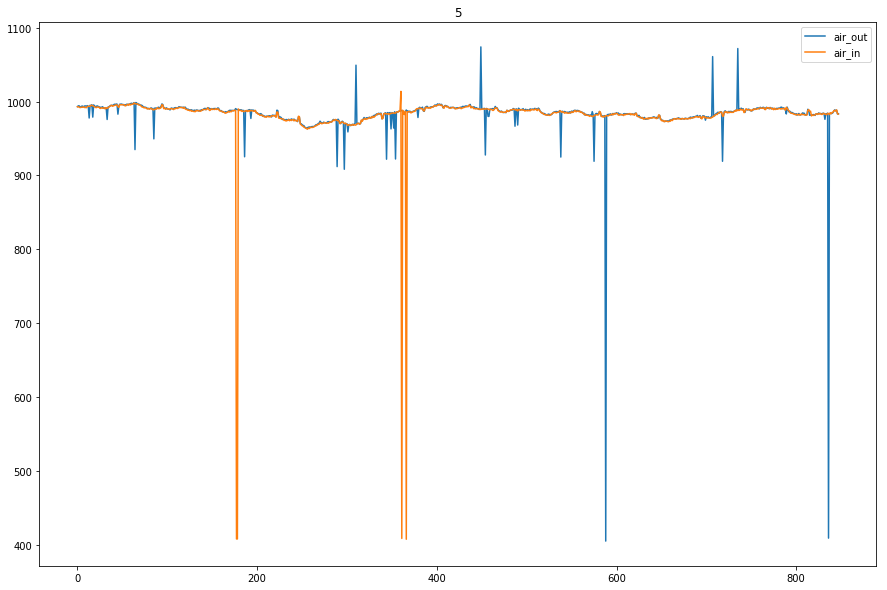

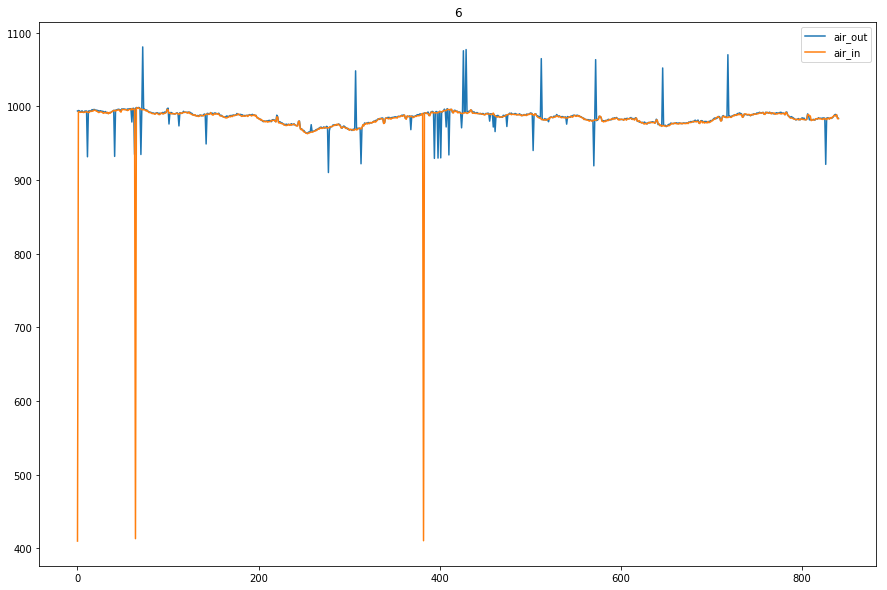

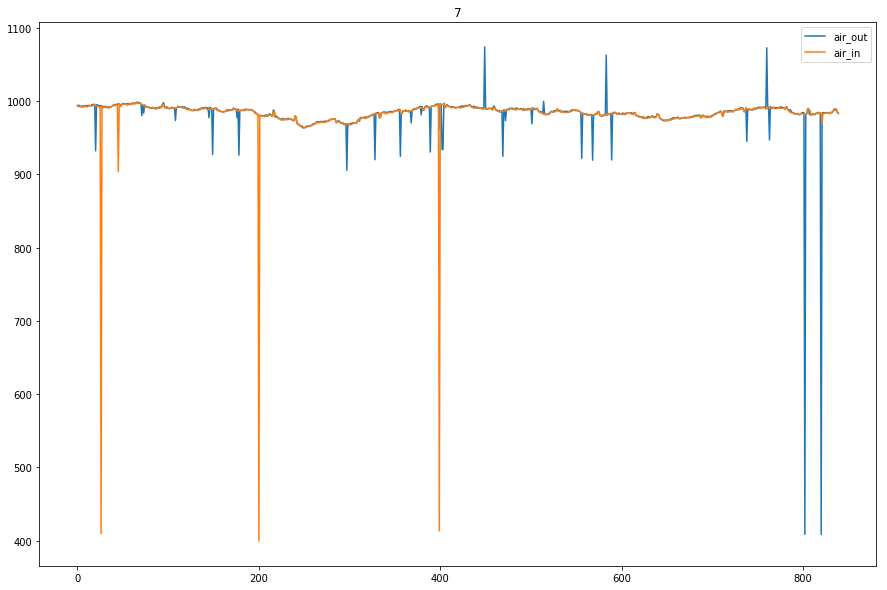

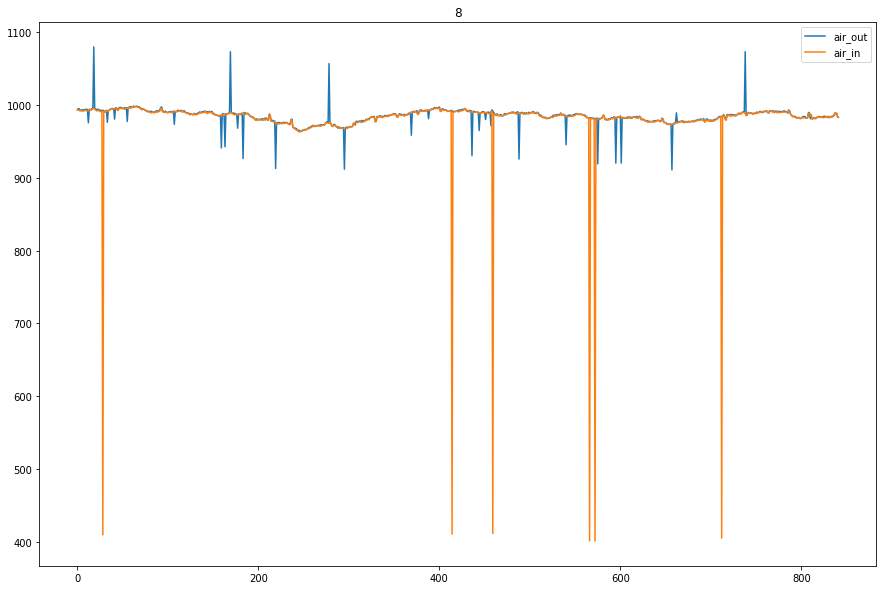

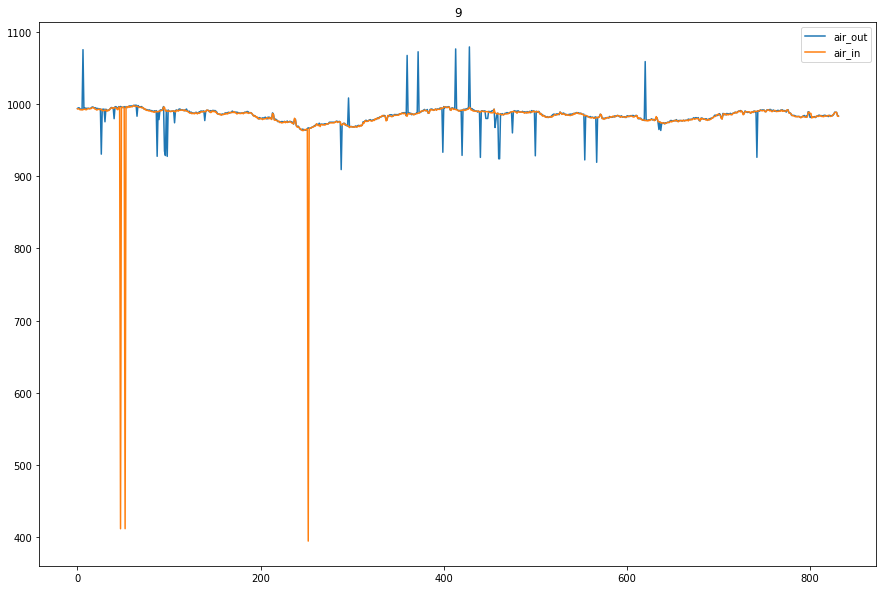

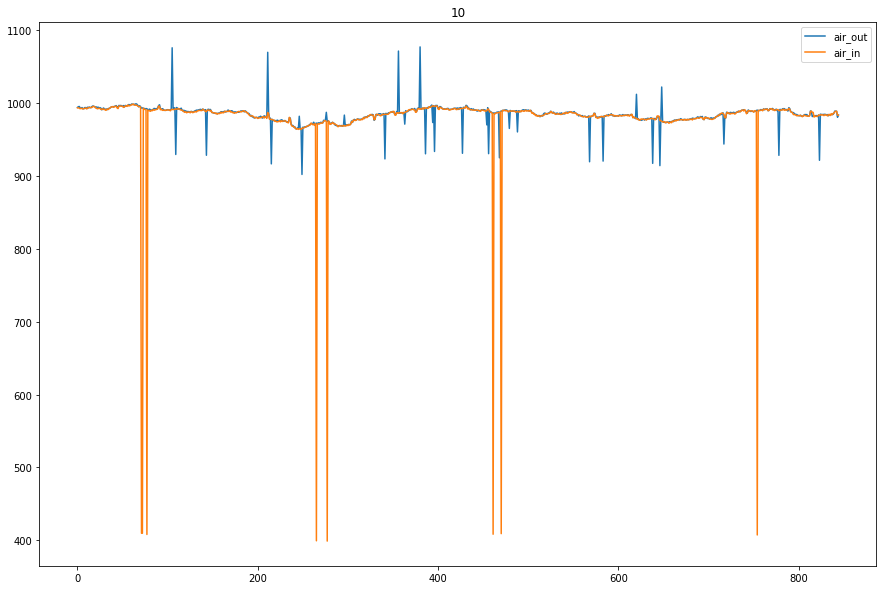

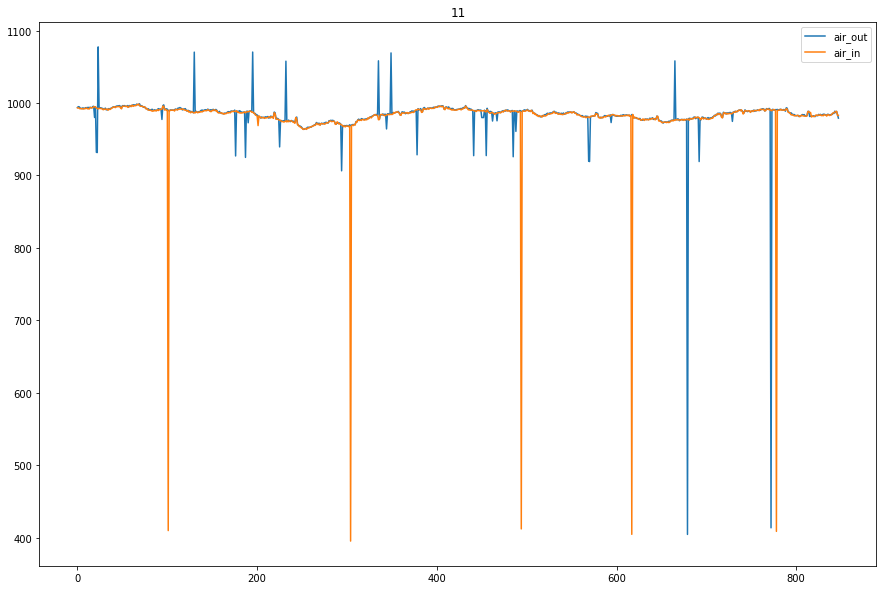

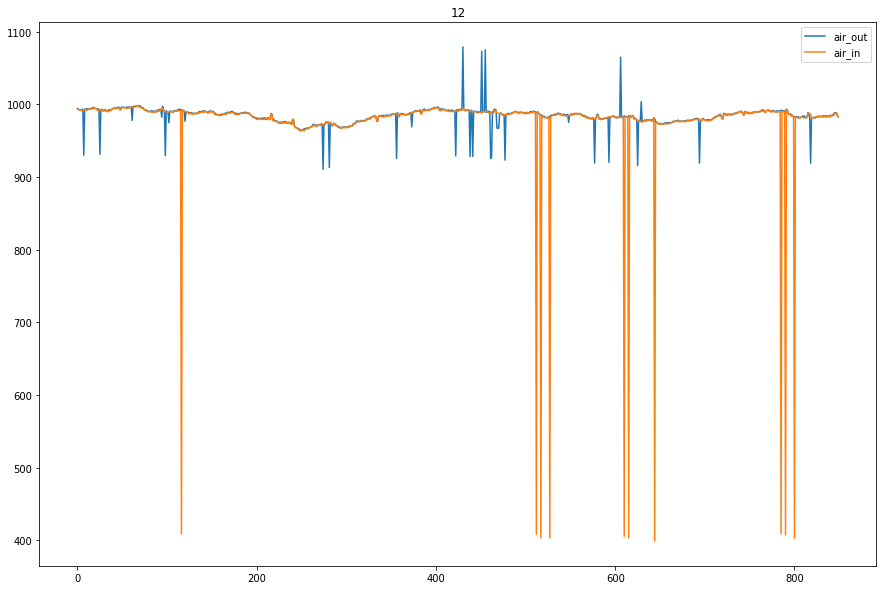

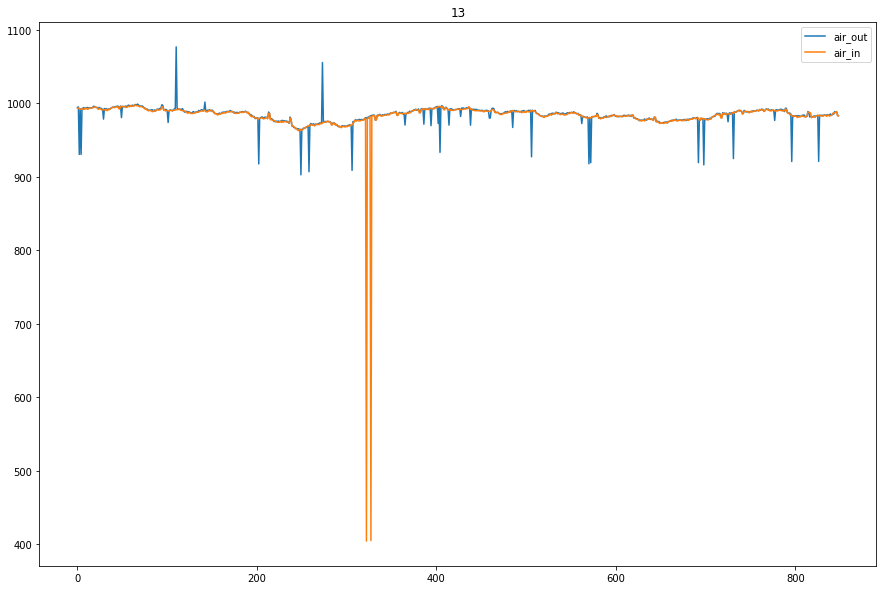

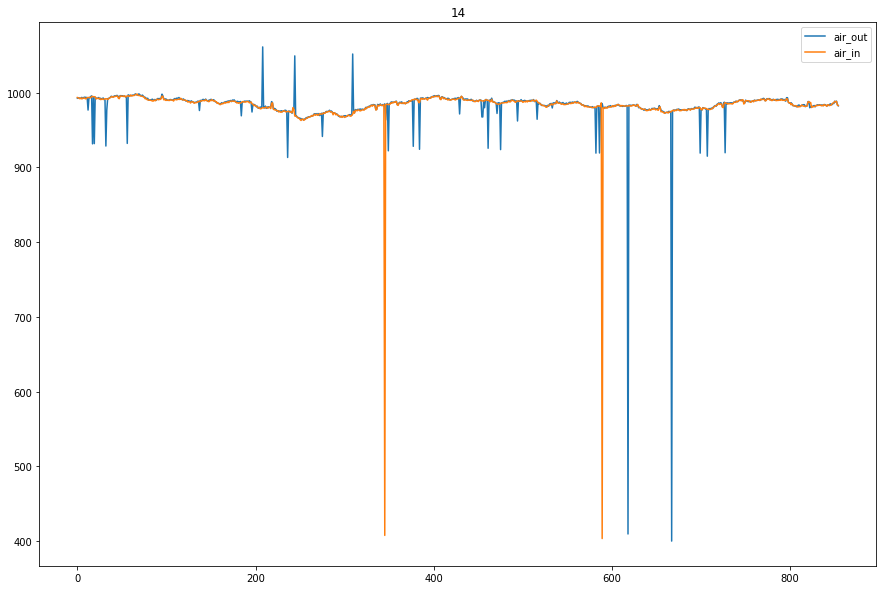

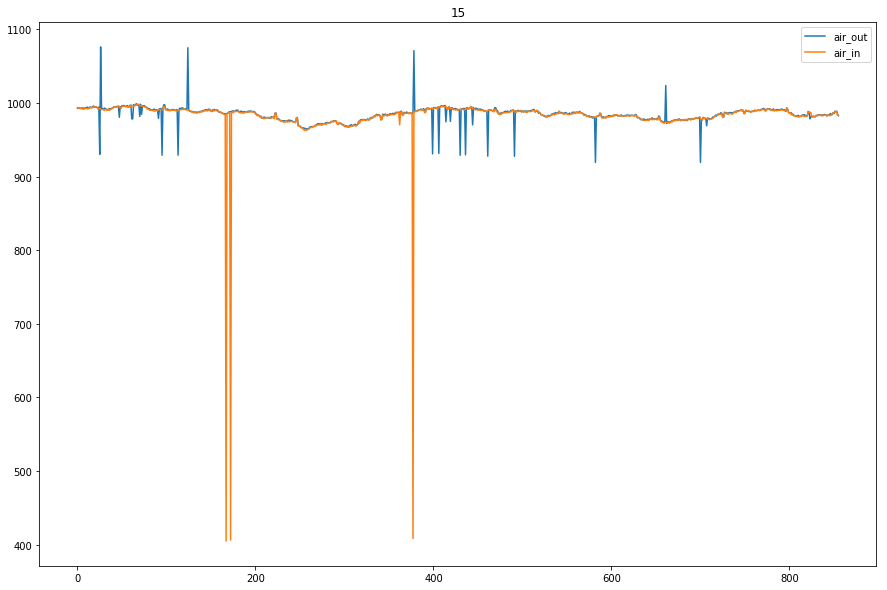

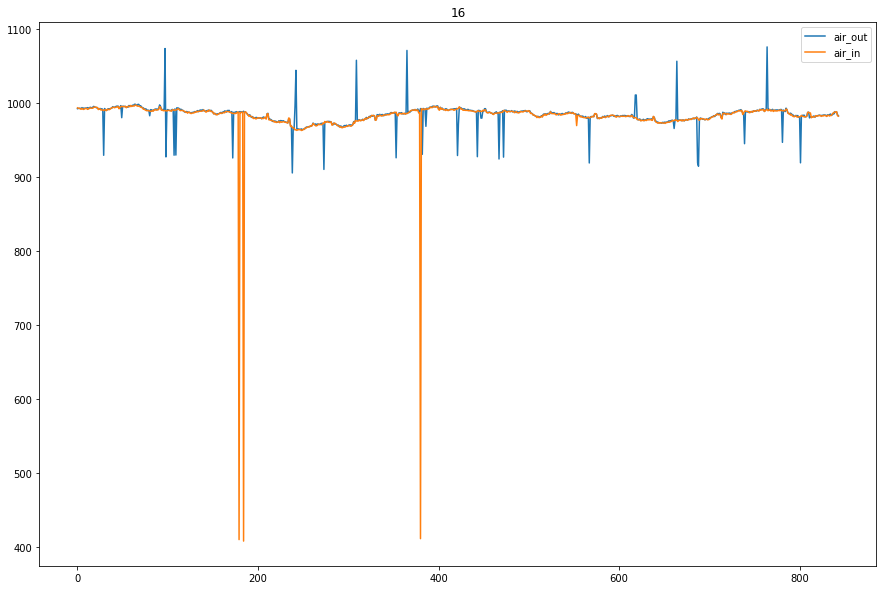

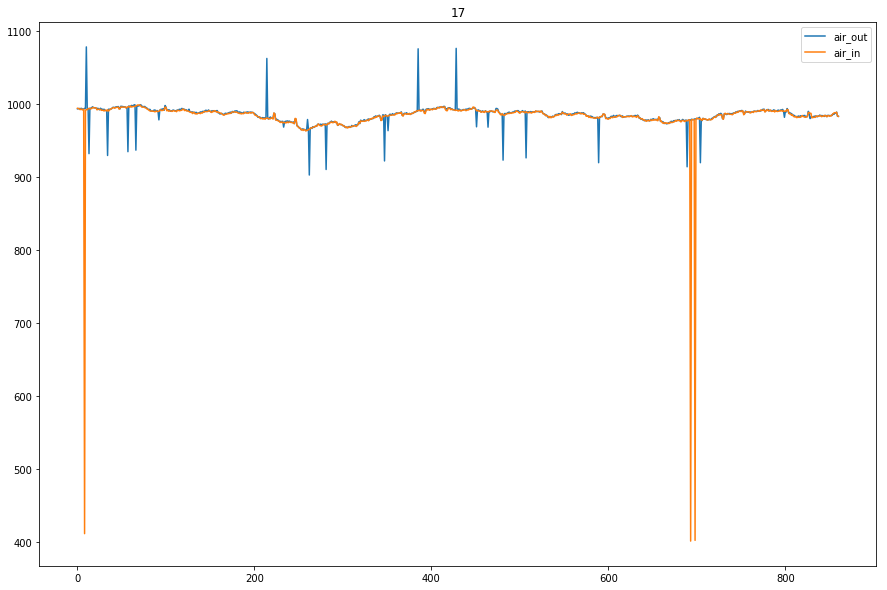

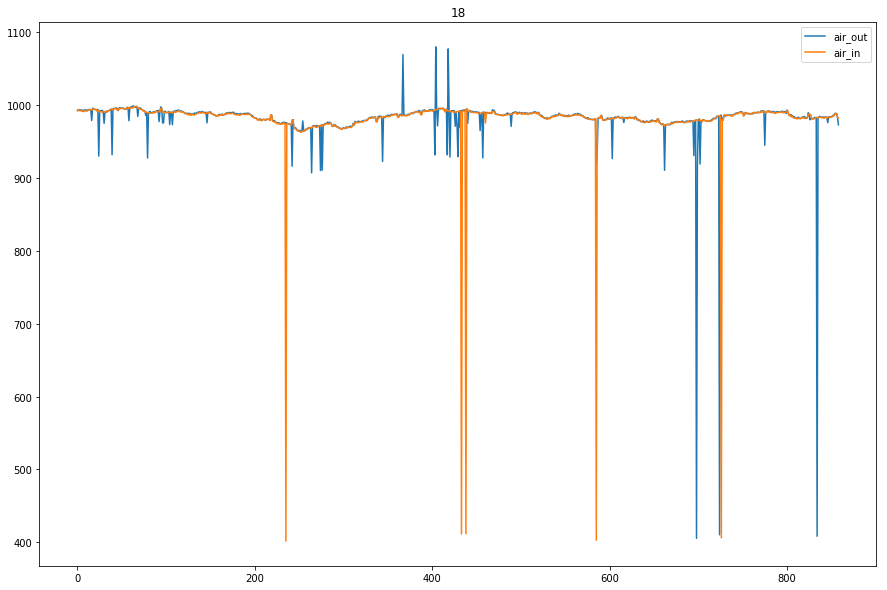

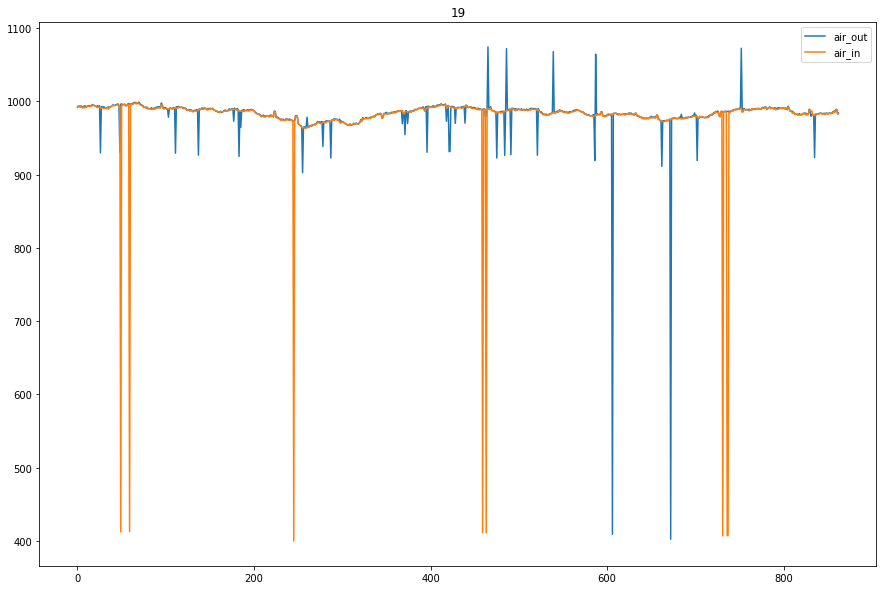

In [6]:
# data['air_in-950/2.5']=(data['air_in']-950)/-2.5+30
# data['hum_in-30/3.5']=(data['hum_in']-30)/-3.5+30
# data['hum_out-30/4.5']=(data['hum_out']-30)/-4.5+27
# data['air_in/hum_in']=data['air_in']/data['hum_in']+2

#     demo['hum_out-30/5']=(demo['hum_out']-30)/-5+26
#     demo['hum_in-30/4']=(demo['hum_in']-30)/-4+27.5
#     demo['air_in-950/2.5']=(demo['air_in']-950)/-2+35
#     demo['air_in/hum_in']=demo['air_in']/demo['hum_in']*0.9+3.6
for i in np.arange(0,20):
    demo=train_data[train_data['min'].isin([i,i+30])].reset_index(drop=True)
#     demo['air_out']=demo['air_out'].apply(lambda x:None if x<950 or x>1050 else x)
#     demo['air_in']=demo['air_in'].apply(lambda x:None if x<950 or x>1050 else x)
#     demo['air_out'].fillna(method='ffill',inplace=True)
#     demo['air_in'].fillna(method='ffill',inplace=True)
    
#     demo['hum_out-']=demo['hum_out']-40
    fig,axes=plt.subplots(figsize=(15,10))
    plt.title(i)
#     demo.plot(y='temperature',ax=axes)
#     demo.plot(y='tem_out',ax=axes)
    demo.plot(y='air_out',ax=axes)
    demo.plot(y='air_in',ax=axes)
#     plt.hlines(5,0, 800, colors = "c", linestyles = "dashed")
#     plt.hlines(26,0, 800, colors = "b", linestyles = "dashed")
#     plt.hlines(95,0, 800, colors = "b", linestyles = "dashed")
#     plt.hlines(89,0, 800, colors = "b", linestyles = "dashed")
# fig,axes=plt.subplots(figsize=(10,5))
# test_data.plot(y='hum_in',ax=axes)
# test_data.plot(y='hum_out',ax=axes)

In [237]:
for i in np.arange(1,20):
    plus=train_data.iloc[:11517,:][train_data['min'].isin([i,i+30])]
    sets=sets.append(plus)

for i in np.arange(50,60):
    plus=train_data.iloc[:11517,:][train_data['min'].isin([i,i-30])]
    sets=sets.append(plus)
    
for i in np.arange(1,20):
    plus=train_data.iloc[11517:,:][train_data['min'].isin([i,i+30])]
    sets=sets.append(plus)
    
for i in np.arange(50,60):
    plus=train_data.iloc[11517:,:][train_data['min'].isin([i,i-30])]
    sets=sets.append(plus)


C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataF

In [253]:
train_data=sets.reset_index(drop=True)

In [254]:
train_data['min']=train_data['min'].apply(lambda x:30 if 20<=x<50 else 0)
test_data['min']=test_data['min'].apply(lambda x:30 if 20<=x<50 else 0)
data=train_data.append(test_data).reset_index(drop=True)

C:\Users\ZC7\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [255]:
data['air_out']=data['air_out'].apply(lambda x:None if x<950 or x>1050 else x)
data['air_in']=data['air_in'].apply(lambda x:None if x<950 or x>1050 else x)
data['air_out'].fillna(method='ffill',inplace=True)
data['air_in'].fillna(method='ffill',inplace=True)

In [256]:
data['hum_subtract']=data['hum_in']-data['hum_out']

data['s_hight_tem_out']=data['tem_out'].apply(lambda x: 1 if x>25 else 0)
data['s_hight_hum_out']=data['hum_out'].apply(lambda x: 1 if x>83 else 0)
data['s_hight_hum_in']=data['hum_in'].apply(lambda x: 1 if x>83 else 0)

data['date']=data['day'].apply(lambda x: x+31 if x<14 else x)-13

data['hum_out-30/5']=(data['hum_out']-30)/-5+26
data['hum_in-30/4']=(data['hum_in']-30)/-4+27.5
data['air_in-950/2.5']=(data['air_in']-950)/-2+35
data['air_in/hum_in']=data['air_in']/data['hum_in']*0.9+3.6

In [257]:
month_bin_dummies_df = pd.get_dummies(data['month']).rename(columns=lambda x: 'month_' + str(x))
data = pd.concat([data, month_bin_dummies_df], axis=1)

hour_bin_dummies_df = pd.get_dummies(data['hour']).rename(columns=lambda x: 'hour_' + str(x))
data = pd.concat([data, hour_bin_dummies_df], axis=1)

min_bin_dummies_df = pd.get_dummies(data['min']).rename(columns=lambda x: 'min_' + str(x))
data = pd.concat([data, min_bin_dummies_df], axis=1)

In [258]:
data.drop(['air_out','day','hour','min','month','s','time','year'],axis=1,inplace=True)

In [259]:
train=data.iloc[:len(train_data),:]
test=data.iloc[len(train_data):,:]

In [260]:
train.shape

(838, 42)

In [267]:
train

,air_in,hum_in,hum_out,tem_out,temperature,hum_subtract,s_hight_tem_out,s_hight_hum_out,s_hight_hum_in,date,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min_0,min_30
0,992.4,80.0,85.0,14.6,15.4,-5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,992.7,82.0,87.0,14.3,15.0,-5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,993.8,82.0,88.0,13.7,14.7,-6.0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,993.3,84.0,91.0,13.2,14.4,-7.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,992.0,84.0,92.0,13.0,14.4,-8.0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5,991.6,81.0,86.0,13.3,13.7,-5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,991.9,82.0,88.0,12.9,13.9,-6.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7,991.8,84.0,91.0,12.5,13.6,-7.0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
8,993.1,85.0,91.0,12.5,13.5,-6.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
9,991.7,86.0,93.0,12.3,13.3,-7.0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [268]:
from sklearn.linear_model import RANSACRegressor#稳健回归
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge#岭回归

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(train.drop(['temperature'],axis=1),train[['temperature']],test_size=0.01592,shuffle=False)

lr=LinearRegression()
ran=RANSACRegressor(random_state=42)
ridge=Ridge()

lr.fit(Xtrain,Ytrain)
ran.fit(Xtrain,Ytrain)
ridge.fit(Xtrain,Ytrain)


lr_label=lr.predict(Xtest)
ran_label=ran.predict(Xtest)
ridge_label=ridge.predict(Xtest)

lr_train_label=lr.predict(Xtrain)
ran_train_label=ran.predict(Xtrain)
ridge_train_label=ridge.predict(Xtrain)

print("LR_test:",mean_squared_error(Ytest,lr_label),'---train:',mean_squared_error(Ytrain,lr_train_label))
print("稳健回归_test:",mean_squared_error(Ytest,ran_label),'---train:',mean_squared_error(Ytrain,ran_train_label))
print("岭回归_test:",mean_squared_error(Ytest,ridge_label),'---train:',mean_squared_error(Ytrain,ridge_train_label))
# LR_test: 0.05575783627722502 ---train: 0.06822600328767059
# 稳健回归_test: 0.05369736478569928 ---train: 0.07017057500331023
# 岭回归_test: 0.05575825569974597 ---train: 0.06822583068639104

# LR_test: 0.07575037876292462 ---train: 0.07209308798699644
# 稳健回归_test: 0.07785837209647553 ---train: 0.08229057501789584
# 岭回归_test: 0.0755521187072977 ---train: 0.07207724337672607

# LR_test: 0.05538910439448988 ---train: 0.0678806079900648
# 稳健回归_test: 0.055597405040205376 ---train: 0.06805732761467587
# 岭回归_test: 0.05546382646172194 ---train: 0.06786149817982551

LR_test: 0.016121807758297198 ---train: 0.07582429295713171
稳健回归_test: 0.016088437352861643 ---train: 0.07684063801487671
岭回归_test: 0.016236370585112233 ---train: 0.0758365329715124


In [269]:
lr_test_label=lr.predict(test.drop(['temperature'],axis=1))
ran_test_label=ran.predict(test.drop(['temperature'],axis=1))
ridge_test_label=ridge.predict(test.drop(['temperature'],axis=1))

label=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test_data/7_2_lr.csv')

print("LR:",mean_squared_error(lr_test_label,label['temperature']))
print("RAN:",mean_squared_error(ran_test_label,label['temperature']))
print("Ridge:",mean_squared_error(ridge_test_label,label['temperature']))
# LR: 1.1218927360226955e-06
# RAN: 0.00872678282639709
# Ridge: 1.1928056790474105e-06


# LR: 0.003415762497286491
# RAN: 0.0024673075511537747
# Ridge: 0.003360224868487399

# LR: 0.000492270944153734
# RAN: 0.0008199705278932167
# Ridge: 0.00045944669641588423

LR: 0.007448656356026386
RAN: 0.0027554816213147394
Ridge: 0.0073810233350766336


In [265]:
test_=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test.csv')
test_['temperature']=ran_test_label
test_[['time','temperature']].to_csv(r"C:/Users/ZC7/Desktop/tianchi/datacastle_rent/7_3_ran_特殊填.csv",index=False)

In [271]:
lr_test_label=lr.predict(test.drop(['temperature'],axis=1))
ran_test_label=ran.predict(test.drop(['temperature'],axis=1))
ridge_test_label=ridge.predict(test.drop(['temperature'],axis=1))

label=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test_data/7_3_ran.csv')

print("LR:",mean_squared_error(lr_test_label,label['temperature']))
print("RAN:",mean_squared_error(ran_test_label,label['temperature']))
print("Ridge:",mean_squared_error(ridge_test_label,label['temperature']))


# LR: 0.015878384029366595
# RAN: 0.01422732571636563
# Ridge: 0.015871694322431486

# LR: 0.010311339257268968
# RAN: 0.011011983176493783
# Ridge: 0.010213807028470011

LR: 0.022322567152559078
RAN: 0.008934866274842378
Ridge: 0.021769470769839396


In [229]:
test_=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test.csv')
test_['temperature']=ran_test_label
test_[['time','temperature']].to_csv(r"C:/Users/ZC7/Desktop/tianchi/datacastle_rent/7_3_ran_特征比zip优化_缺失值填充.csv",index=False)